<a href="https://colab.research.google.com/github/Dennis-Farias/cursoIAeML/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
X_train[4]

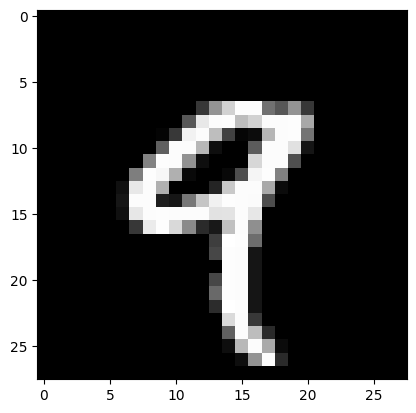

In [5]:
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [7]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [8]:
x_train_noisy = X_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [9]:
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [ ]:
from pickle import decode_long
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, X_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, X_test))

In [ ]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)
noisy_image = np.clip(noisy_image, 0.0, 1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

denoised_image = denoised_image.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

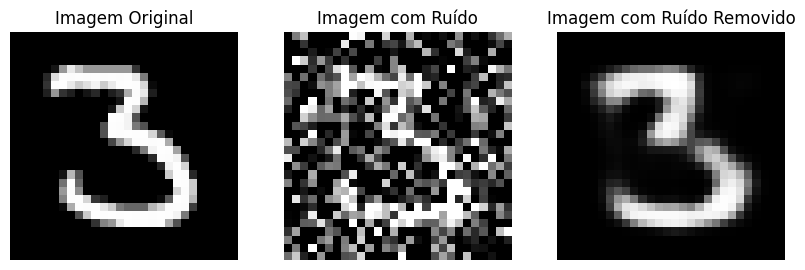

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image.reshape(28, 28), cmap='gray')
plt.title('Imagem com Ruído')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Imagem com Ruído Removido')
plt.axis('off')